<a href="https://colab.research.google.com/github/ThuyHaLE/Problem3_Natural-Language-Processing/blob/main/NLP_word_embedding(Context-independent).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Tokenization is the first step in natural language processing (NLP) projects. It involves dividing a text into individual units, known as tokens. Tokens can be words or punctuation marks. These tokens are then transformed into numerical vectors representing words. Two main concepts are vectorization and embedding. Text Vectorization is the process of turning words into numerical vectors in a one-dimensional space. Word Embedding (Word Vector) is a type of vectorization through deep learning as dense vectors in a high-dimensional space.
- Text Vectorization
  - Traditional approach
    - One-Hot Encoding
    - Bag of Words
    - CountVectorizer
    - TF-IDF
      
- Word Embedding
  - Context-independent
    - Neural Word Embedding
      - Word2Vec
    - Pretrained Word-Embedding
      - GloVe
      - FastText
  - Context-dependent
    - RNN based
      - ELMO
      - CoVe
    - Transformer based
      - BERT
      - XML
      - RoBERTa
      - ALBERT

- Document embedding
  - Doc2Vec
    - Distributed Memory (DM)
    - Distributed Bag of Words (DBOW)

#Word Embedding

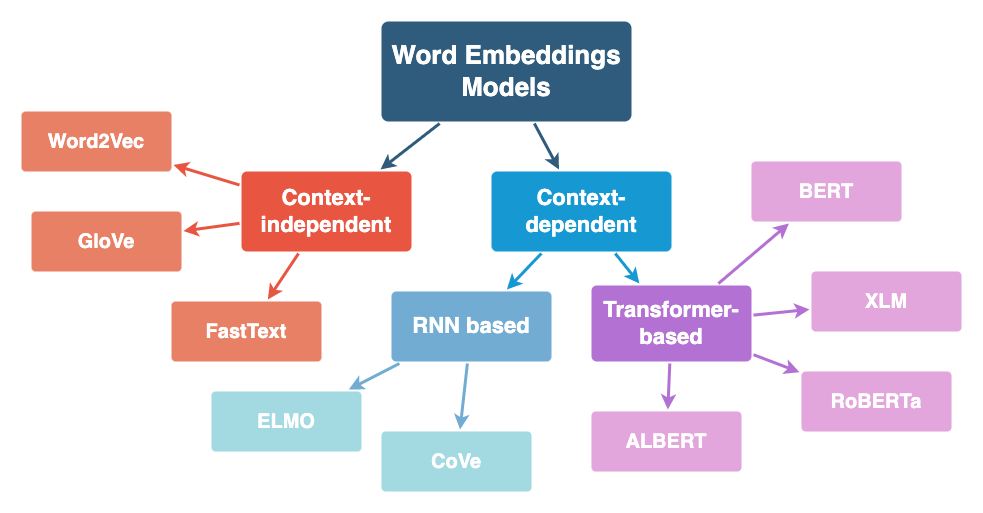

##Context-independent

###Word2Vec

Word2Vec is a neural approach for generating word embeddings to represent words as continuous vector spaces. <Br>
Word2Vec aims to capture the semantic relationships between words by mapping them to high-dimensional vectors. The underlying idea is that words with similar meanings should have similar vector representations. Starting with a random vector or one-hot vector then generate to high-dimensional vector. <Br>
Continuous Bag of Words (CBOW) and Skip-gram are two neural embedding methods for Word2Vec.

Neural architecture

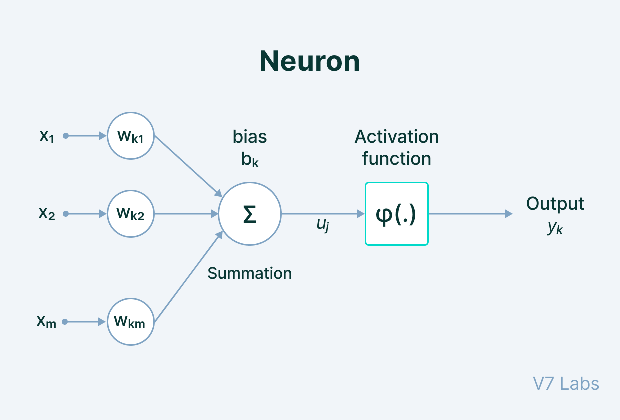

####CBOW

Predict a target word based on its context, which consists of the surrounding words in a given window. Given a sequence of words in a context window, the model is trained to predict the target word at the center of the window.

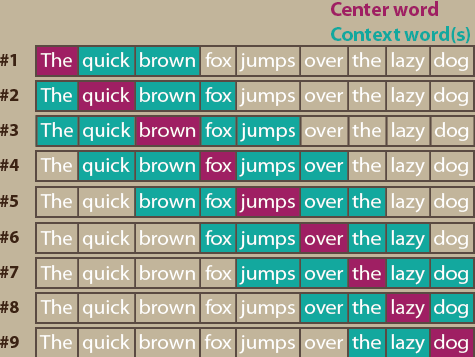

In [ ]:
# Sample data
raw_text = "The quick brown fox jumps over the lazy doc"
tokens = raw_text.lower().split()
print(f'tokens: {tokens}')

vocab = set(tokens)
word_to_index = {word: i for i, word in enumerate(vocab)}
print(f'vocab_to_index_dict: {word_to_index}')
index_to_word = {i: word for i, word in enumerate(vocab)}
print(f'index_to_word_dict: {index_to_word}')

word_to_vec = {word: [1 if word == v else 0 for v in vocab] for word in vocab}
print(f'vec_dict: {word_to_vec}')

context_size = 2
for i in range(len(tokens)):
  print(f"center word: {[tokens[i]]} => context words: {tokens[i - context_size:i] + tokens[i + 1:i + context_size+1]}")

tokens: ['the', 'quick', 'brown', 'fox', 'jumps', 'over', 'the', 'lazy', 'doc']
vocab_to_index_dict: {'brown': 0, 'fox': 1, 'jumps': 2, 'over': 3, 'lazy': 4, 'doc': 5, 'quick': 6, 'the': 7}
index_to_word_dict: {0: 'brown', 1: 'fox', 2: 'jumps', 3: 'over', 4: 'lazy', 5: 'doc', 6: 'quick', 7: 'the'}
vec_dict: {'brown': [1, 0, 0, 0, 0, 0, 0, 0], 'fox': [0, 1, 0, 0, 0, 0, 0, 0], 'jumps': [0, 0, 1, 0, 0, 0, 0, 0], 'over': [0, 0, 0, 1, 0, 0, 0, 0], 'lazy': [0, 0, 0, 0, 1, 0, 0, 0], 'doc': [0, 0, 0, 0, 0, 1, 0, 0], 'quick': [0, 0, 0, 0, 0, 0, 1, 0], 'the': [0, 0, 0, 0, 0, 0, 0, 1]}
center word: ['the'] => context words: ['quick', 'brown']
center word: ['quick'] => context words: ['brown', 'fox']
center word: ['brown'] => context words: ['the', 'quick', 'fox', 'jumps']
center word: ['fox'] => context words: ['quick', 'brown', 'jumps', 'over']
center word: ['jumps'] => context words: ['brown', 'fox', 'over', 'the']
center word: ['over'] => context words: ['fox', 'jumps', 'the', 'lazy']
center w

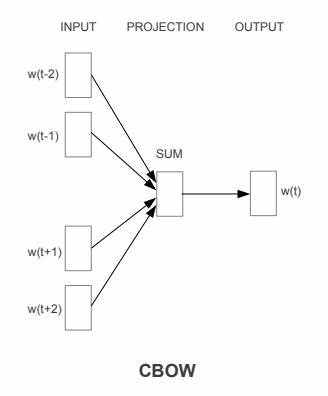

In [ ]:
#Generate training data
import numpy as np
data = []
for i in range(len(tokens)):
  context = [word_to_vec[word] for word in tokens[i - context_size:i] + tokens[i + 1:i + context_size+1]]
  target = word_to_vec[tokens[i]]
  data.append((np.array(context).sum(0), np.array(target)))

for d in data:
  print(f'context: {d[0]}, target: {d[1]}')

context: [1 0 0 0 0 0 1 0], target: [0 0 0 0 0 0 0 1]
context: [1 1 0 0 0 0 0 0], target: [0 0 0 0 0 0 1 0]
context: [0 1 1 0 0 0 1 1], target: [1 0 0 0 0 0 0 0]
context: [1 0 1 1 0 0 1 0], target: [0 1 0 0 0 0 0 0]
context: [1 1 0 1 0 0 0 1], target: [0 0 1 0 0 0 0 0]
context: [0 1 1 0 1 0 0 1], target: [0 0 0 1 0 0 0 0]
context: [0 0 1 1 1 1 0 0], target: [0 0 0 0 0 0 0 1]
context: [0 0 0 1 0 1 0 1], target: [0 0 0 0 1 0 0 0]
context: [0 0 0 0 1 0 0 1], target: [0 0 0 0 0 1 0 0]


Softmax function <Br>
$σ(z)_i = \frac{e^{z_i}}{∑^k_{j=1}e^{z_j}} $

In [ ]:
#Activation Functions
import numpy as np
def softmax(z: np.ndarray) -> np.ndarray:
    """Calculate Softmax for the input
    Args:
     v: array of values
    Returns:
     array of probabilities
    """
    e_z = np.exp(z)
    sum_e_z = np.sum(e_z)
    return e_z / sum_e_z

Cross entropy loss<Br>
$J=-\sum\limits_{k=1}^{V}y_k\log{\hat{y}_k} $

In [ ]:
#Cross-entropy loss.
def cross_entropy_loss(y_predicted: np.ndarray,
                       y_actual: np.ndarray) -> np.ndarray:
    """Calculate cross-entropy loss  for the prediction
    Args:
     y_predicted: what our model predicted
     y_actual: the known labels
    Returns:
     cross-entropy loss for y_predicted
    """
    loss = -np.sum(y_actual * np.log(y_predicted))
    return loss

CBOW architecture

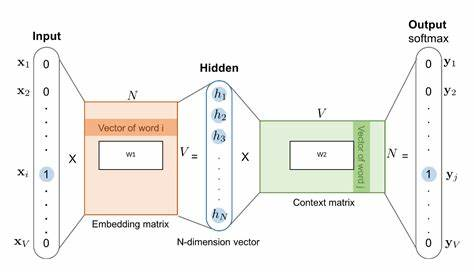

$V$: Size of vocabulary <Br>
$N$: Number of embedding layer/ hidden unit <Br>
$W1$: Embedding matrix (VxN) <Br>
$W2$: Context matrix (NxV) <Br>
$x$: vector for center word $w_i$ (Vx1) <Br>
⇒ word embedding : $h=W^T.x$ (Nx1) <Br>
⇒ context_adding : $u=W'.h$ (Vx1). <Br>

In [ ]:
def cbow(context, label, embedding_matrix, embedding_biases, context_matrix, context_biases, alpha = 0.03):
  x = context.reshape(vocab_size, 1)
  y = label.reshape(vocab_size, 1)

  #Forward propagation
  z1 = np.dot(embedding_matrix, x) + embedding_biases
  z2 = np.dot(context_matrix, z1) + context_biases
  y_hat = softmax(z2)
  #prediction = np.argmax(y_hat)
  #print(f"The predicted word at index {prediction} is '{index_to_word[prediction]}'.")
  loss = cross_entropy_loss(y_hat, y)

  #Backpropagation
  grad_b2 = y_hat - y
  grad_W2 = np.dot(y_hat - y, z1.T)
  W2_new = context_matrix - alpha * grad_W2
  b2_new = context_biases - alpha * grad_b2
  grad_b1 = np.dot(context_matrix.T, y_hat - y)
  grad_W1 = np.dot((np.dot(context_matrix.T, y_hat - y)), x.T)
  W1_new = embedding_matrix - alpha * grad_W1
  b1_new = embedding_biases - alpha * grad_b1

  return W1_new, b1_new, W2_new, b2_new, loss

vocab size (V): 8
embedding size (N): 5
embedding_matrix (NxV): (5, 8)
embedding_biases: (5, 1)
context_matrix (VxN): (8, 5)
context_biases: (8, 1)
plotting losses: 


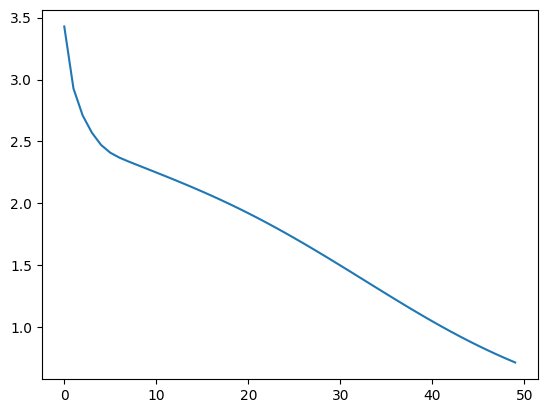

In [ ]:
#Neural Network Initialization
import numpy as np
import matplotlib.pyplot as plt

#V: Number of unique vocabulary size
vocab_size = len(vocab)
print(f'vocab size (V): {vocab_size}')
#N: Number of embedding layer/ hidden unit
embed_size = 5
print(f'embedding size (N): {embed_size}')

#Initialization of the weights and biases
#Define the embedding matrix
embedding_matrix = np.random.rand(embed_size, vocab_size)
print(f'embedding_matrix (NxV): {embedding_matrix.shape}')
#Define the vector of biases
embedding_biases = np.random.rand(embed_size).reshape(embed_size, 1)
print(f'embedding_biases: {embedding_biases.shape}')
#Define the context matrix
context_matrix = np.random.rand(vocab_size, embed_size)
print(f'context_matrix (VxN): {context_matrix.shape}')
#Define the vector of biases
context_biases = np.random.rand(vocab_size).reshape(vocab_size, 1)
print(f'context_biases: {context_biases.shape}')

#training
n_epochs = 50
losses = []
thetas_path = []
for epoch in range ( n_epochs ) :
  ls = []
  for i, (context, label) in enumerate(data):
    embedding_matrix, embedding_biases, context_matrix, context_biases, loss = cbow(context, label,
                                                                                    embedding_matrix, embedding_biases,
                                                                                    context_matrix, context_biases)
    thetas_path.append((embedding_matrix, embedding_biases,
                        context_matrix, context_biases))
    ls.append(loss)
  mean_loss = np.sum(ls)/len(ls)
  #print(mean_loss)
  losses.append (mean_loss)

#plotting losses
print('plotting losses: ')
li = list(zip(range(len(losses)), losses))
plt.plot(*zip(*li))

In [ ]:
#Word embedding
#Load trained model
best_thetas = thetas_path[losses.index(min(losses))]
embedding_matrix, embedding_biases, context_matrix, context_biases = best_thetas

In [ ]:
#Embedding
word_vec = word_to_vec['lazy']
z1 = np.dot(embedding_matrix, word_vec) + embedding_biases
z2 = np.dot(context_matrix, z1) + context_biases
word_embed = softmax(z2)
print("word embedding for 'lazy': \n", word_embed)

word embedding for 'lazy': 
 [[0.02016619 0.04569862 0.01433478 0.01256019 0.0528987 ]
 [0.0118958  0.03234702 0.00783668 0.00666728 0.03868426]
 [0.01836854 0.04755266 0.01235143 0.01059208 0.0563713 ]
 [0.01063493 0.02345717 0.00764539 0.00672823 0.02702204]
 [0.01786599 0.03857679 0.01295829 0.01144306 0.04427063]
 [0.01288514 0.02864891 0.00923214 0.00811413 0.03305009]
 [0.02199789 0.04812507 0.01586818 0.01398305 0.05535781]
 [0.02184074 0.05238563 0.01516154 0.01316327 0.06125839]]


In [ ]:
#Embedding
embedded_vector = []
raw_text = "The quick brown fox jumps over the lazy doc"
for token in raw_text.lower().split():
  word_vec = word_to_vec[token]
  z1 = np.dot(embedding_matrix, word_vec) + embedding_biases
  z2 = np.dot(context_matrix, z1) + context_biases
  word_embed = softmax(z2)
  embedded_vector.append(word_embed)
print(f"word embedding for '{raw_text}': \n", np.array(embedded_vector))

word embedding for 'The quick brown fox jumps over the lazy doc': 
 [[[0.06444804 0.01094437 0.02068029 0.03121541 0.01731098]
  [0.05102304 0.00583681 0.01270925 0.02102686 0.0102253 ]
  [0.07277771 0.00926105 0.01940904 0.03132694 0.01578336]
  [0.03253658 0.0058586  0.01083999 0.01614111 0.00912737]
  [0.05281358 0.00995859 0.01812358 0.02669913 0.01533098]
  [0.03993383 0.00706683 0.01315725 0.01967072 0.01105926]
  [0.06641816 0.01217318 0.02238088 0.03318905 0.01887844]
  [0.07650148 0.0114866  0.02268529 0.03523474 0.01875631]]

 [[0.03326445 0.03355837 0.02328717 0.0169525  0.0392091 ]
  [0.02212622 0.02236552 0.01430664 0.00970359 0.02705355]
  [0.03307712 0.03341719 0.02185044 0.01510557 0.04004566]
  [0.01723285 0.01738006 0.01220703 0.00898013 0.02020247]
  [0.02854699 0.02878427 0.02040994 0.01513913 0.03332346]
  [0.02098955 0.02117068 0.01481631 0.01086582 0.02464617]
  [0.03545391 0.03575364 0.02520373 0.0186001  0.0414952 ]
  [0.03740032 0.03775383 0.02554231 0.0181888

Using torch

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

# Define CBOW model
class CBOWModel(nn.Module):
	def __init__(self, vocab_size, embed_size):
		super(CBOWModel, self).__init__()
		self.embeddings = nn.Embedding(vocab_size, embed_size)
		self.linear = nn.Linear(embed_size, vocab_size)

	def forward(self, context):
		context_embeds = self.embeddings(context).sum(dim=1)
		output = self.linear(context_embeds)
		return output

# Sample data
context_size = 2
raw_text = "word embeddings are awesome"
tokens = raw_text.split()
vocab = set(tokens)
word_to_index = {word: i for i, word in enumerate(vocab)}
data = []
for i in range(2, len(tokens) - 2):
	context = [word_to_index[word] for word in tokens[i - 2:i] + tokens[i + 1:i + 3]]
	target = word_to_index[tokens[i]]
	data.append((torch.tensor(context), torch.tensor(target)))

# Hyperparameters
vocab_size = len(vocab)
embed_size = 10
learning_rate = 0.01
epochs = 100

# Initialize CBOW model
cbow_model = CBOWModel(vocab_size, embed_size)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(cbow_model.parameters(), lr=learning_rate)

# Training loop
for epoch in range(epochs):
	total_loss = 0
	for context, target in data:
		optimizer.zero_grad()
		output = cbow_model(context)
		loss = criterion(output.unsqueeze(0), target.unsqueeze(0))
		loss.backward()
		optimizer.step()
		total_loss += loss.item()
	#print(f"Epoch {epoch + 1}, Loss: {total_loss}")

# Example usage: Get embedding for a specific word
word_to_lookup = "embeddings"
word_index = word_to_index[word_to_lookup]
embedding = cbow_model.embeddings(torch.tensor([word_index]))
print(f"Embedding for '{word_to_lookup}': {embedding.detach().numpy()}")

Embedding for 'embeddings': [[-0.4358724   0.5459082   1.5435756  -1.3158703  -1.0938241   0.1415855
   1.0092945  -0.7858529  -0.844788   -0.83789134]]


####Skip-Gram

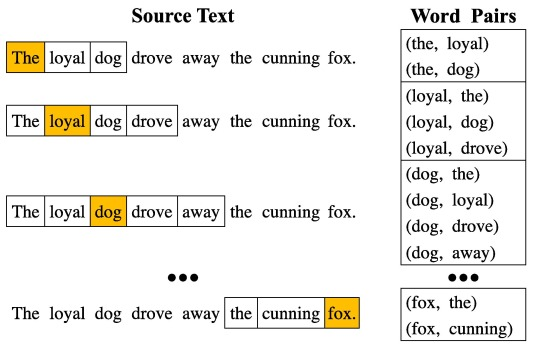

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import string

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
corpus = "The earth revolves around the sun. The moon revolves around the earth"
stop_words = set(stopwords.words('english'))
training_data = []
sentences = corpus.split(".")
for i in range(len(sentences)):
    sentences[i] = sentences[i].strip()
    sentence = sentences[i].split()
    x = [word.strip(string.punctuation) for word in sentence if word not in stop_words]
    x = [word.lower() for word in x]
    training_data.append(x)
print('training_data: ', training_data)

data = {}
for sentence in training_data:
    for word in sentence:
        if word not in data:
            data[word] = 1
        else:
            data[word] += 1
data = sorted(list(data.keys()))
word_index_dict = {}
index_word_dict = {}
for i in range(len(data)):
    word_index_dict[data[i]] = i
    index_word_dict[i] = data[i]
print('word_index_dict: ', word_index_dict)
print('index_word_dict: ', index_word_dict)

print('skip-gram: ')
window_size = 2
for sentence in training_data:
  for i in range(len(sentence)):
    center_word = [0 for x in range(len(word_index_dict))]
    center_word[word_index_dict[sentence[i]]] = 1
    context = []
    for j in range(i-window_size,i+window_size+1):
      if i!=j and j>=0 and j<len(sentence):
        context.append(sentence[j])
        print(f'center_word: {sentence[i]} => {sentence[j]} => ({sentence[i], sentence[j]})')

training_data:  [['the', 'earth', 'revolves', 'around', 'sun'], ['the', 'moon', 'revolves', 'around', 'earth']]
word_index_dict:  {'around': 0, 'earth': 1, 'moon': 2, 'revolves': 3, 'sun': 4, 'the': 5}
index_word_dict:  {0: 'around', 1: 'earth', 2: 'moon', 3: 'revolves', 4: 'sun', 5: 'the'}
skip-gram: 
center_word: the => earth => (('the', 'earth'))
center_word: the => revolves => (('the', 'revolves'))
center_word: earth => the => (('earth', 'the'))
center_word: earth => revolves => (('earth', 'revolves'))
center_word: earth => around => (('earth', 'around'))
center_word: revolves => the => (('revolves', 'the'))
center_word: revolves => earth => (('revolves', 'earth'))
center_word: revolves => around => (('revolves', 'around'))
center_word: revolves => sun => (('revolves', 'sun'))
center_word: around => earth => (('around', 'earth'))
center_word: around => revolves => (('around', 'revolves'))
center_word: around => sun => (('around', 'sun'))
center_word: sun => revolves => (('sun', 're

Skip-gram architecture

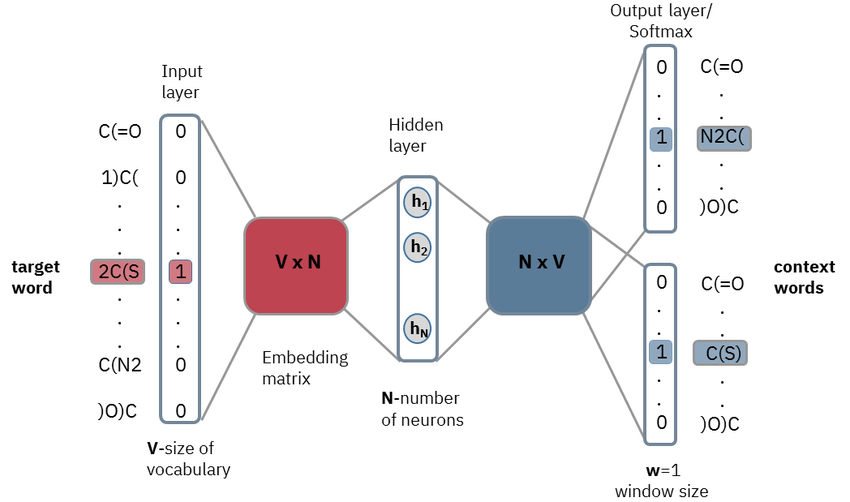

$V$: Size of vocabulary <Br>
$N$: Number of embedding layer/ hidden unit <Br>
$W$: Embedding matrix (VxN) <Br>
$W'$: Context matrix (NxV) <Br>
$x$: vector for center word $w_i$ (Vx1) <Br>
⇒ word embedding : $h=W^T.x$ (Nx1) <Br>
⇒ context_adding : $u=W'.h$ (Vx1). <Br>

In [ ]:
#Neural Network Initialization
import numpy as np
import matplotlib.pyplot as plt

#V: Number of unique vocabulary size
V = len(word_index_dict)
print(f'Vocab size: {V}')
#N: Number of embedding layer/ hidden unit
N = 5
print(f'Number of embedding layer/ hidden unit: {N}')

#Initialization of the weights and biases
#Define the embedding matrix
embedding_matrix = np.random.uniform(-0.8, 0.8, (V, N))
print(f'Embedding matrix: {embedding_matrix.shape}')
#Define the context matrix
context_matrix = np.random.uniform(-0.8, 0.8, (N, V))
print(f'Context matrix: {context_matrix.shape}')

Vocab size: 6
Number of embedding layer/ hidden unit: 5
Embedding matrix: (6, 5)
Context matrix: (5, 6)


In [ ]:
window_size = 2
X_train = []
y_train = []
#for i in range(len(words)):
for sentence in training_data:
    for i in range(len(sentence)):
      #center word:
      center_word = [0 for x in range(V)]
      center_word[word_index_dict[sentence[i]]] = 1
      X_train.append(center_word)

      #context words:
      context = [0 for x in range(V)]
      for j in range(i-window_size,i+window_size+1):
        if i!=j and j>=0 and j<len(sentence):
          context[word_index_dict[sentence[j]]] += 1
      y_train.append(context)

for x, y in zip(X_train, y_train):
  print('x_train: ', x, '=>', 'y_train: ', y, 'number of context words: ', sum(y))

x_train:  [0, 0, 0, 0, 0, 1] => y_train:  [0, 1, 0, 1, 0, 0] number of context words:  2
x_train:  [0, 1, 0, 0, 0, 0] => y_train:  [1, 0, 0, 1, 0, 1] number of context words:  3
x_train:  [0, 0, 0, 1, 0, 0] => y_train:  [1, 1, 0, 0, 1, 1] number of context words:  4
x_train:  [1, 0, 0, 0, 0, 0] => y_train:  [0, 1, 0, 1, 1, 0] number of context words:  3
x_train:  [0, 0, 0, 0, 1, 0] => y_train:  [1, 0, 0, 1, 0, 0] number of context words:  2
x_train:  [0, 0, 0, 0, 0, 1] => y_train:  [0, 0, 1, 1, 0, 0] number of context words:  2
x_train:  [0, 0, 1, 0, 0, 0] => y_train:  [1, 0, 0, 1, 0, 1] number of context words:  3
x_train:  [0, 0, 0, 1, 0, 0] => y_train:  [1, 1, 1, 0, 0, 1] number of context words:  4
x_train:  [1, 0, 0, 0, 0, 0] => y_train:  [0, 1, 1, 1, 0, 0] number of context words:  3
x_train:  [0, 1, 0, 0, 0, 0] => y_train:  [1, 0, 0, 1, 0, 0] number of context words:  2


Softmax function <Br>
$σ(z)_i = \frac{e^{z_i}}{∑^k_{j=1}e^{z_j}} $

In [ ]:
def softmax(x):
	"""Compute softmax values for each sets of scores in x."""
	e_x = np.exp(x - np.max(x))
	return e_x / e_x.sum()

Loss function

$P(w_j|w_i)$: the probability that $w_j$ is a context word of given input word $w_i$. <Br>
$y_j= $ $P(w_j|w_i) = \frac{e^{u_j}}{∑^v_{j'=1}e^{u_{j'}}}$ with $j∈V$.
Where:
- $u_j$ = $V_{w_j}^T.h$ is context_adding of word $w_j$
- $V_{w_j}$(Nx1) is column of $W'$ corresponding to a word $w_j$

Window size = 2 → Center word: $w_i$, Context words: $(w_{i-2}, w_{i-1}, w_{i+1}, w_{i+2})$ <Br>
$⇒ P(w_{i-2}, w_{i-1}, w_{i+1}, w_{i+2}|w_i)$ $=$ $P(w_{i-2}|w_i).P(w_{i-1}|w_i).P(w_{i+1}|w_i).P(w_{i+2}|w_i)$ <Br>

Context words range from $C∈[0, V]$ ⇒ goal is maximize $\prod^C_{c=1}\frac{e^{u_{jc*}}}{∑^v_{j'=1}e^{u_{j'}}}$ <Br>
Using negative log-likelihood to get loss function, then minimize this loss <Br>
⇒ Loss function: <Br>
$E=-log{\prod^C_{c=1}\frac{e^{u_{jc*}}}{∑^v_{j'=1}e^{u_{j'}}}}$ $⇒ E=-log({\prod^C_{c=1}e^{u_{jc*}}})+log(\sum^v_{j'=1}e^{u_{j'}})^C$ $⇒ E=-∑^C_{c=1}u_{jc*}+C.log(\sum^v_{j'=1}e^{u_{j'}})$

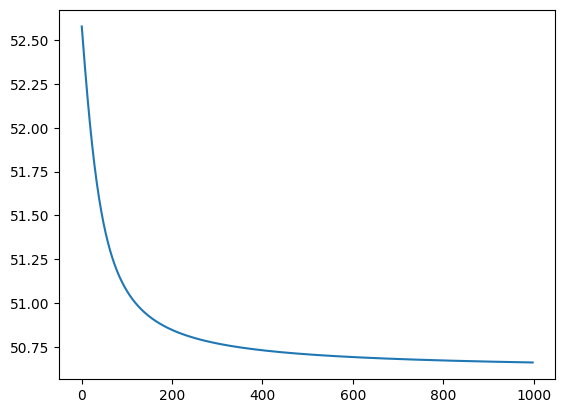

In [ ]:
epochs = 1000
alpha = 0.001
losses = []
thetas_path = []
for x in range(1,epochs):
  loss = 0
  for j in range(len(X_train)):
      #feed_forward
      h = np.dot(embedding_matrix.T, X_train[j]).reshape(N,1)
      u = np.dot(context_matrix.T,h)
      y = softmax(u)
      #top_k = np.argpartition(y.reshape(len(y)), -window_size*2)[-window_size*2:]
      #print('target words:', vectorized_corpus[str(X_train[j])])
      #print('context words:', [index_word_dict[k] for k in top_k])

      #backpropagate
      e = y - np.asarray(y_train[j]).reshape(V,1)
      dLd_context_matrix = np.dot(h,e.T)
      X = np.array(X_train[j]).reshape(V,1)
      dLd_embedding_matrix = np.dot(X, np.dot(context_matrix,e).T)
      context_matrix = context_matrix - alpha*dLd_context_matrix
      embedding_matrix = embedding_matrix - alpha*dLd_embedding_matrix
      thetas_path.append((context_matrix, embedding_matrix))

      #loss function
      C = 0
      for m in range(V):
        if(y_train[j][m]): #only value > 0
            loss += -1*u[m][0]
            C += 1
      loss += C*np.log(np.sum(np.exp(u)))
  losses.append(loss)
  #print("epoch ", x, " loss = ",loss)
  alpha *= 1/((1+alpha*x)) #Learning rate decay (α=(1/(1+decayRate×epochNumber))*α0)

import matplotlib.pyplot as plt
li = list(zip(range(len(losses)), losses))
plt.plot(*zip(*li))

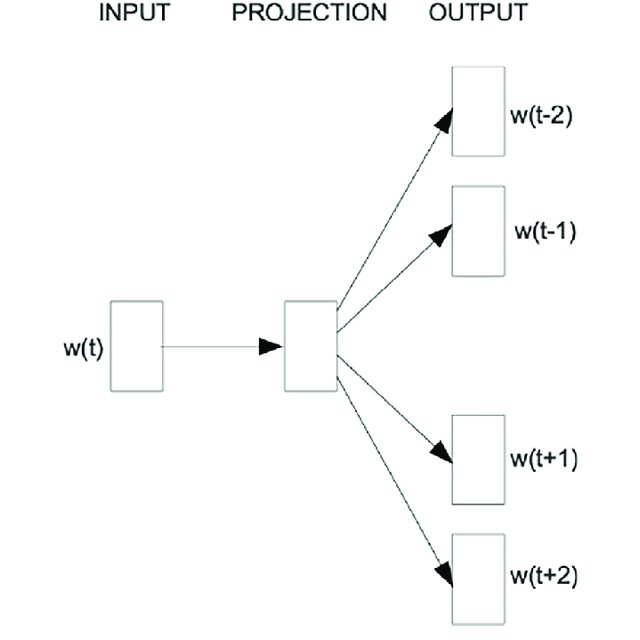

In [ ]:
#Word embedding
#Load trained model
best_thetas = thetas_path[losses.index(min(losses))]
context_matrix, embedding_matrix = best_thetas

In [ ]:
#Embedding
def vectorize(word):
  X = [0 for i in range(V)]
  X[word_index_dict[word]] = 1
  return X

def word_embedding(word):
  word_vec = vectorize(word)
  h = np.dot(embedding_matrix.T, word_vec).reshape(N,1)
  u = np.dot(context_matrix.T,h)
  word_embed = softmax(u)
  return word_embed

word = "revolves"
number_of_predictions = 4
if word in data:
  X = vectorize(word)
  h = np.dot(embedding_matrix.T, X).reshape(N,1)
  prediction = softmax(np.dot(context_matrix.T,h))
  output = {}
  for i in range(V):
    output[prediction[i][0]] = i
  top_context_words = []
  for k in sorted(output,reverse=True):
    if data[output[k]] != word:
      top_context_words.append(data[output[k]])
    if(len(top_context_words)>=number_of_predictions):
      break
  print(f"predicted {number_of_predictions} context words for: '{word}'", top_context_words)
else:
  print("Word not found in dictionary")

# Check if context words are in the model's vocabulary
context_vectors = [word_embedding(word) for word in top_context_words if word in data]
# Calculate the average of the context vectors
if context_vectors:
    center_embedding = np.mean(context_vectors, axis=0)
else:
    center_embedding = None  # Handle case where no context words are in vocabulary
print(f"context_vectors {number_of_predictions} context words for '{word}': \n", np.array(context_vectors).shape)
print(f"word embedding for '{word}': \n", center_embedding)

predicted 4 context words for: 'revolves' ['earth', 'around', 'sun', 'the']
context_vectors 4 context words for 'revolves': 
 (4, 6, 1)
word embedding for 'revolves': 
 [[0.18824511]
 [0.18420735]
 [0.18921601]
 [0.15469113]
 [0.16861103]
 [0.11502937]]


In [ ]:
#Embedding
embedded_vector = []
number_of_predictions = 4
#raw_text = "The quick brown fox jumps over the lazy doc"
raw_text = "The earth revolves around the sun"

for word in raw_text.lower().split():
  if word in data:
    X = vectorize(word)
    h = np.dot(embedding_matrix.T, X).reshape(N,1)
    prediction = softmax(np.dot(context_matrix.T,h))
    output = {}
    for i in range(V):
      output[prediction[i][0]] = i
    top_context_words = []
    for k in sorted(output,reverse=True):
      if data[output[k]] != word:
        top_context_words.append(data[output[k]])
      if(len(top_context_words)>=number_of_predictions):
        break
    context_vectors = [word_embedding(word) for word in top_context_words if word in data]
    if context_vectors:
      center_embedding = np.mean(context_vectors, axis=0)
    else:
      center_embedding = None
    embedded_vector.append(center_embedding)
  else:
    print(f"Word '{word}' not found in dictionary")


print(f"word embedding for '{raw_text}': \n", np.array(embedded_vector))

word embedding for 'The earth revolves around the sun': 
 [[[0.2057325 ]
  [0.23192815]
  [0.17944549]
  [0.12403679]
  [0.14946634]
  [0.10939074]]

 [[0.1825549 ]
  [0.22273739]
  [0.14188067]
  [0.15661563]
  [0.15829824]
  [0.13791317]]

 [[0.18824511]
  [0.18420735]
  [0.18921601]
  [0.15469113]
  [0.16861103]
  [0.11502937]]

 [[0.20035091]
  [0.18606344]
  [0.19727782]
  [0.14523572]
  [0.16588558]
  [0.10518653]]

 [[0.2057325 ]
  [0.23192815]
  [0.17944549]
  [0.12403679]
  [0.14946634]
  [0.10939074]]

 [[0.20695689]
  [0.25090057]
  [0.09396621]
  [0.15366923]
  [0.15753684]
  [0.13697025]]]


Using Gensim

In [ ]:
import gensim
from gensim.models import Word2Vec
import numpy as np

# Example sentences
sentences = [
		 ["the", "quick", "brown", "fox", "jumps", "over", "the", "lazy", "dog"],
		  ["I", "love", "machine", "learning", "and", "natural", "language", "processing"]
			]

# Train Word2Vec model
model = Word2Vec(sentences, vector_size=7, window=5, min_count=1, workers=4)

# Example context words for a center word
center_word = "learning"
context_words = ["love", "machine", "and"]  # Predicted context words

# Check if context words are in the model's vocabulary
context_vectors = [model.wv[word] for word in context_words if word in model.wv]

# Calculate the average of the context vectors
if context_vectors:
    center_embedding = np.mean(context_vectors, axis=0)
else:
    center_embedding = None  # Handle case where no context words are in vocabulary

# Print the center embedding
print("Center Word Embedding (averaged from context words):")
print(center_embedding)

Center Word Embedding (averaged from context words):
[-0.03357063 -0.07850824 -0.01452038 -0.02554499  0.01286649  0.05139998
 -0.00863163]


###GloVe

**GloVe (Global Vectors for Word Representation)**

GloVe is an unsupervised learning algorithm for obtaining vector representations for words. This algorithm is an improvement over the Word2Vec approach as it considers global statistics instead of local statistics. Training is performed on aggregated global word-word co-occurrence statistics from a corpus, and the resulting representations showcase interesting linear substructures of the word vector space.

Global statistics mean, the words considered from across the whole corpus. Unlike the occurrence matrix, the co-occurrence matrix tells you how often a particular word pair occurs together. Each value in the co-occurrence matrix represents a pair of words occurring together.

https://nlp.stanford.edu/projects/glove/



In [ ]:
# Sample data
raw_text = ['I like deep learning', 'I like NLP', 'I enjoy flying']
tokens = []
for t in raw_text:
  tokens+=t.lower().split()
vocab = list(set(tokens))
print('vocabulary: ', vocab)
word_to_index = {word: i for i, word in enumerate(vocab)}
print(f'vocab_to_index_dict: {word_to_index}')

#co-occurrence matrix
import pandas as pd
import numpy as np
co_occurrence_matrix = np.zeros((len(word_to_index),len(word_to_index)))
window_size = 4
for sentence in raw_text:
    words = sentence.lower().split()
    for i in range(len(words)):
        word = words[i]
        for j in range(max(0, i - window_size), min(i + window_size + 1, len(words))):
            if i != j:
              co_occurrence_matrix[word_to_index[word]][word_to_index[words[j]]] += 1
print('co occurrence matrix: ')
pd.DataFrame(co_occurrence_matrix, columns = list(word_to_index.keys()), index = list(word_to_index.keys()))

vocabulary:  ['flying', 'like', 'deep', 'nlp', 'enjoy', 'i', 'learning']
vocab_to_index_dict: {'flying': 0, 'like': 1, 'deep': 2, 'nlp': 3, 'enjoy': 4, 'i': 5, 'learning': 6}
co occurrence matrix: 


,flying,like,deep,nlp,enjoy,i,learning
flying,0.0,0.0,0.0,0.0,1.0,1.0,0.0
like,0.0,0.0,1.0,1.0,0.0,2.0,1.0
deep,0.0,1.0,0.0,0.0,0.0,1.0,1.0
nlp,0.0,1.0,0.0,0.0,0.0,1.0,0.0
enjoy,1.0,0.0,0.0,0.0,0.0,1.0,0.0
i,1.0,2.0,1.0,1.0,1.0,0.0,1.0
learning,0.0,1.0,1.0,0.0,0.0,1.0,0.0


Step - 1:
Construct a co-occurrence matrix that counts the number of times each word appears in the same context as every other word.

In [ ]:
import numpy as np
from collections import defaultdict

corpus = ['I like deep learning', 'I like NLP', 'I enjoy flying']
# Initialize vocabulary and co-occurrence matrix
vocab = set()
co_occurrence = defaultdict(float)
window_size = 4
# Iterate through the corpus to build vocabulary and co-occurrence matrix
for sentence in corpus:
    words = sentence.lower().split()
    for i in range(len(words)):
        word = words[i]
        vocab.add(word)
        for j in range(max(0, i - window_size), min(i + window_size + 1, len(words))):
            if i != j:
                co_occurrence[(word, words[j])] += 1.0 / abs(i - j)
                #the co-occurrence value, measure of distance between (i, j),
                #the smaller distance — the better coherence or relationship
co_occurrence_df = pd.DataFrame(np.zeros((len(word_to_index.keys()), len(word_to_index.keys()))),
                                columns = list(word_to_index.keys()),
                                index = list(word_to_index.keys()))
for (i, j), v in co_occurrence.items():
  co_occurrence_df[i][j] =  round(v, 2)
co_occurrence_df

,flying,like,deep,nlp,enjoy,i,learning
flying,0.0,0.0,0.0,0.0,1.0,0.50,0.00
like,0.0,0.0,1.0,1.0,0.0,2.00,0.50
deep,0.0,1.0,0.0,0.0,0.0,0.50,1.00
nlp,0.0,1.0,0.0,0.0,0.0,0.50,0.00
enjoy,1.0,0.0,0.0,0.0,0.0,1.00,0.00
i,0.5,2.0,0.5,0.5,1.0,0.00,0.33
learning,0.0,0.5,1.0,0.0,0.0,0.33,0.00


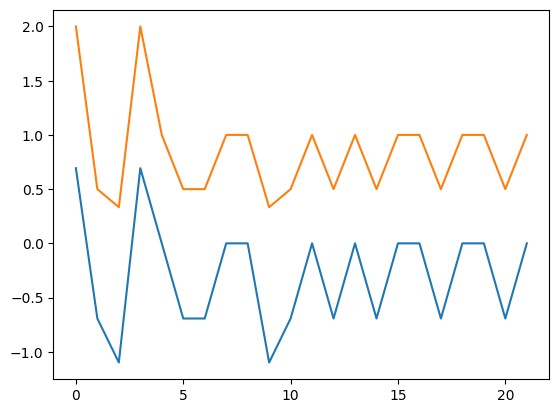

In [ ]:
import matplotlib.pyplot as plt
values = [np.log(i) for i in list(co_occurrence.values())]
li = list(zip(range(len(values)), values))
li1 = list(zip(range(len(list(co_occurrence.values()))), list(co_occurrence.values())))
plt.plot(*zip(*li))
plt.plot(*zip(*li1))

Step - 2:
Use the co-occurrence matrix to compute the word embeddings using the GloVe algorithm. This involves training a model to minimize the error between the word vectors' dot product and the co-occurrence counts' logarithm.

In [ ]:
embedding_dim = 10
word_embeddings = {word: np.random.randn(embedding_dim) for word in vocab}
word_embeddings

{'flying': array([-0.28562344,  0.12697988, -0.67642082, -0.57101596,  0.67837273,
         0.14110307, -0.25826054,  0.77115674,  0.33578412,  0.42764734]),
 'like': array([-0.35345162, -0.19658118,  0.98824327, -0.9842146 , -0.5976942 ,
        -1.63204126, -1.14102624, -0.53335104,  0.48952757, -0.32037509]),
 'deep': array([ 0.15306934, -0.79868562,  0.34697155, -0.58298913, -0.65534374,
        -1.0043378 , -0.37399182, -1.91424876,  0.23588691, -1.09015134]),
 'nlp': array([-1.90163265, -1.56005922,  0.08700039,  2.39541303,  0.21278038,
        -2.01386392, -1.60133716,  0.90571022,  0.83787271, -0.48081648]),
 'enjoy': array([ 0.4802476 , -1.71070917,  1.0705445 , -1.52979325, -0.58365762,
         0.29260908, -1.10187406,  1.68542462, -2.07667478, -1.13778313]),
 'i': array([-1.84985904, -0.17267372, -1.18909345, -2.33437762, -0.3599147 ,
         0.23169424, -0.11610644, -0.53131648, -0.12702386,  0.1286033 ]),
 'learning': array([ 0.1029419 , -1.76116179,  1.30466977, -1.270

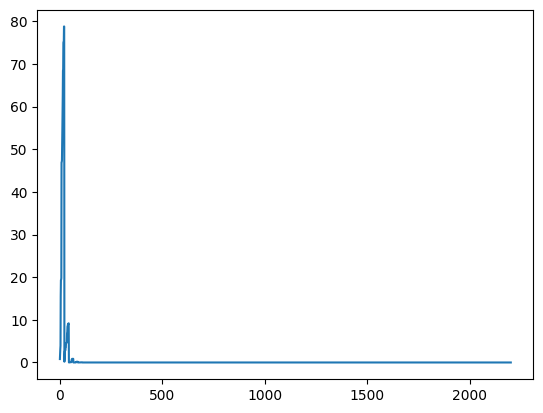

In [ ]:
learning_rate = 0.1
num_epochs = 100
losses = []
thetas_path = []
# Gradient descent to update word embeddings
for epoch in range(num_epochs):
    total_loss = 0
    for (word_i, word_j), observed_count in co_occurrence.items():
        # Calculate dot product of word embeddings (cosine similarity as y_hat)
        dot_product = np.dot(word_embeddings[word_i], word_embeddings[word_j])

        # Calculate difference and update,
        diff = dot_product - np.log(observed_count) # minimize distance between y_hat and y, observed_count as y
        total_loss += 0.5 * diff**2 #mean squared loss
        losses.append(total_loss)
        gradient = diff * word_embeddings[word_j]
        word_embeddings[word_i] -= learning_rate * gradient
        thetas_path.append(word_embeddings)
    #print(f"Epoch: {epoch+1}, Loss: {total_loss}")

import matplotlib.pyplot as plt
li = list(zip(range(len(losses)), losses))
plt.plot(*zip(*li))

Step - 3:
Save the resulting word embeddings to a file or use them directly in your model.

In [ ]:
#Word embedding
#Load trained model
best_thetas = thetas_path[losses.index(min(losses))]
word_embeddings = best_thetas
word_embeddings

{'flying': array([ 0.54224511,  0.17167245, -0.18447567, -0.2472928 ,  0.75006976,
         0.08327947, -0.18989642,  0.76884749,  0.39332693,  0.35507849]),
 'like': array([-0.22231258,  0.92357211,  0.47059856, -0.96711065, -0.15084754,
        -0.5649529 , -0.8314235 ,  0.76038753, -0.12208182,  0.37690459]),
 'deep': array([ 0.23978517,  0.38345033, -0.36079935,  0.16523603, -0.24117811,
        -0.5021284 , -0.7676896 , -0.78635167, -0.72404421, -1.11444494]),
 'nlp': array([-1.30766949, -1.19125297,  0.48918861,  2.37583112,  0.17567847,
        -2.02444385, -1.57403755,  0.93071186,  0.77685232, -0.42926503]),
 'enjoy': array([ 0.42848108, -1.7144163 ,  1.04060257, -1.551987  , -0.58591841,
         0.28403722, -1.11500378,  1.68138671, -2.07231597, -1.13607379]),
 'i': array([-2.25995978, -0.09704167, -1.3945275 , -0.84447612, -0.16817856,
         0.45145566, -0.01695644,  0.23625592, -0.31527964,  0.31138743]),
 'learning': array([-0.13227969, -1.5770881 ,  1.05994687, -1.371

In [ ]:
#Embedding
text = 'I like deep learning'
embedded_text = [word_embeddings[t.lower()] for t in text.split()]
embedded_text

[array([-2.25995978, -0.09704167, -1.3945275 , -0.84447612, -0.16817856,
         0.45145566, -0.01695644,  0.23625592, -0.31527964,  0.31138743]),
 array([-0.22231258,  0.92357211,  0.47059856, -0.96711065, -0.15084754,
        -0.5649529 , -0.8314235 ,  0.76038753, -0.12208182,  0.37690459]),
 array([ 0.23978517,  0.38345033, -0.36079935,  0.16523603, -0.24117811,
        -0.5021284 , -0.7676896 , -0.78635167, -0.72404421, -1.11444494]),
 array([-0.13227969, -1.5770881 ,  1.05994687, -1.3712277 , -0.72242931,
        -1.02309924,  0.21581715, -1.79966657,  1.26465829, -0.20070529])]

Using GloVe as a pretrained model

In [ ]:
#Load pre-trained model (Stanford)
!wget -q http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove*.zip

Archive:  glove.6B.zip
  inflating: glove.6B.50d.txt        
  inflating: glove.6B.100d.txt       
  inflating: glove.6B.200d.txt       
  inflating: glove.6B.300d.txt       


In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

# create the dictionary
x = {'text', 'the', 'leader', 'prime', 'natural', 'language'}
tokenizer = Tokenizer()
tokenizer.fit_on_texts(x)

# number of unique words in dictionary
word_index = tokenizer.word_index
print("Number of unique words in dictionary=", len(word_index))
print("Dictionary is = ", word_index)

vocab_size = len(word_index) + 1 #Adding again 1 because of reserved 0 index
embedding_dim = 50
#Initialize embedding matrix (zero matrix)
embedding_matrix_vocab = np.zeros((vocab_size, embedding_dim))
print(f'Embedding matrix: {embedding_matrix_vocab.shape}')

Number of unique words in dictionary= 6
Dictionary is =  {'leader': 1, 'the': 2, 'text': 3, 'prime': 4, 'language': 5, 'natural': 6}
Embedding matrix: (7, 50)


In [ ]:
filepath = '/content/glove.6B.50d.txt'
vocab = {}
with open(filepath, encoding="utf8") as f:
  for line in f:
    word, *vector = line.split() #word and a vector representation of word (len=50)
    #if word in word_index (because of reserved 0 index), filling embedding matrix of this word with its vector representation
    vocab[word] = np.array(vector, dtype=np.float32)[:embedding_dim]
    if word in word_index:
      idx = word_index[word]
      embedding_matrix_vocab[idx] = np.array(vector, dtype=np.float32)[:embedding_dim]
print(f'Loaded {len(vocab)} word vectors')
print(f'Updated mbedding matrix: {embedding_matrix_vocab.shape}')

Loaded 400000 word vectors
Updated mbedding matrix: (7, 50)


In [ ]:
embedding_matrix_vocab[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
for word, index in word_index.items():
  print('word: ', word)
  print('vector representation of word: ', embedding_matrix_vocab[index])

word:  leader
vector representation of word:  [-0.1567      0.26117     0.78881001  0.65206999  1.20019996  0.35400999
 -0.34298     0.31702    -1.15020001 -0.16099     0.15798    -0.53501999
 -1.34679997  0.51783001 -0.46441001 -0.19846     0.27474999 -0.26154
  0.25531     0.33388001 -1.04130006  0.52525002 -0.35442999 -0.19137
 -0.08964    -2.33139992  0.12433    -0.94405001 -1.02330005  1.35070002
  2.55240011 -0.16897    -1.72899997  0.32548001 -0.30914    -0.63056999
 -0.22211    -0.15589    -0.43597999  0.0568     -0.090885    0.75028002
 -1.31529999 -0.75358999  0.82898998  0.051397   -1.48049998 -0.11134
  0.27090001 -0.48712999]
word:  the
vector representation of word:  [ 0.41800001  0.24968    -0.41242     0.1217      0.34527001 -0.044457
 -0.49687999 -0.17862    -0.00066023 -0.6566      0.27843001 -0.14767
 -0.55677003  0.14658    -0.0095095   0.011658    0.10204    -0.12792
 -0.84429997 -0.12181    -0.016801   -0.33278999 -0.1552     -0.23131
 -0.19181    -1.88230002 -0.7

In [ ]:
## To find the nearest neighbors of a word
def find_nearest(word, vocab, k=5):
  distances = []
  word_vec = vocab[word]
  for w, vec in vocab.items():
    distance = np.linalg.norm(word_vec - vec)
    distances.append((w, distance))
  distances = sorted(distances, key=lambda x: x[1])
  return distances[:k]
print(find_nearest('cat', vocab))

## To find the analogy between words
def find_analogy(a, b, c, vocab):
  a_vec = vocab[a]
  b_vec = vocab[b]
  c_vec = vocab[c]
  d_vec = b_vec - a_vec + c_vec
  distances = []
  for w, vec in vocab.items():
    distance = np.linalg.norm(d_vec - vec)
    distances.append((w, distance))
  distances = sorted(distances, key=lambda x: x[1])
  return distances[:1]
print(find_analogy('king', 'man', 'queen', vocab))
print(find_analogy('paris', 'france', 'italy', vocab))

[('cat', 0.0), ('dog', 1.8846031), ('rabbit', 2.45728), ('monkey', 2.8102055), ('cats', 2.8972247)]
[('woman', 2.8391206)]
[('italy', 3.6404355)]


30 first vocabulary: ['the', ',', '.', 'of', 'to', 'and', 'in', 'a', '"', "'s", 'for', '-', 'that', 'on', 'is', 'was', 'said', 'with', 'he', 'as', 'it', 'by', 'at', '(', ')', 'from', 'his', "''", '``', 'an']


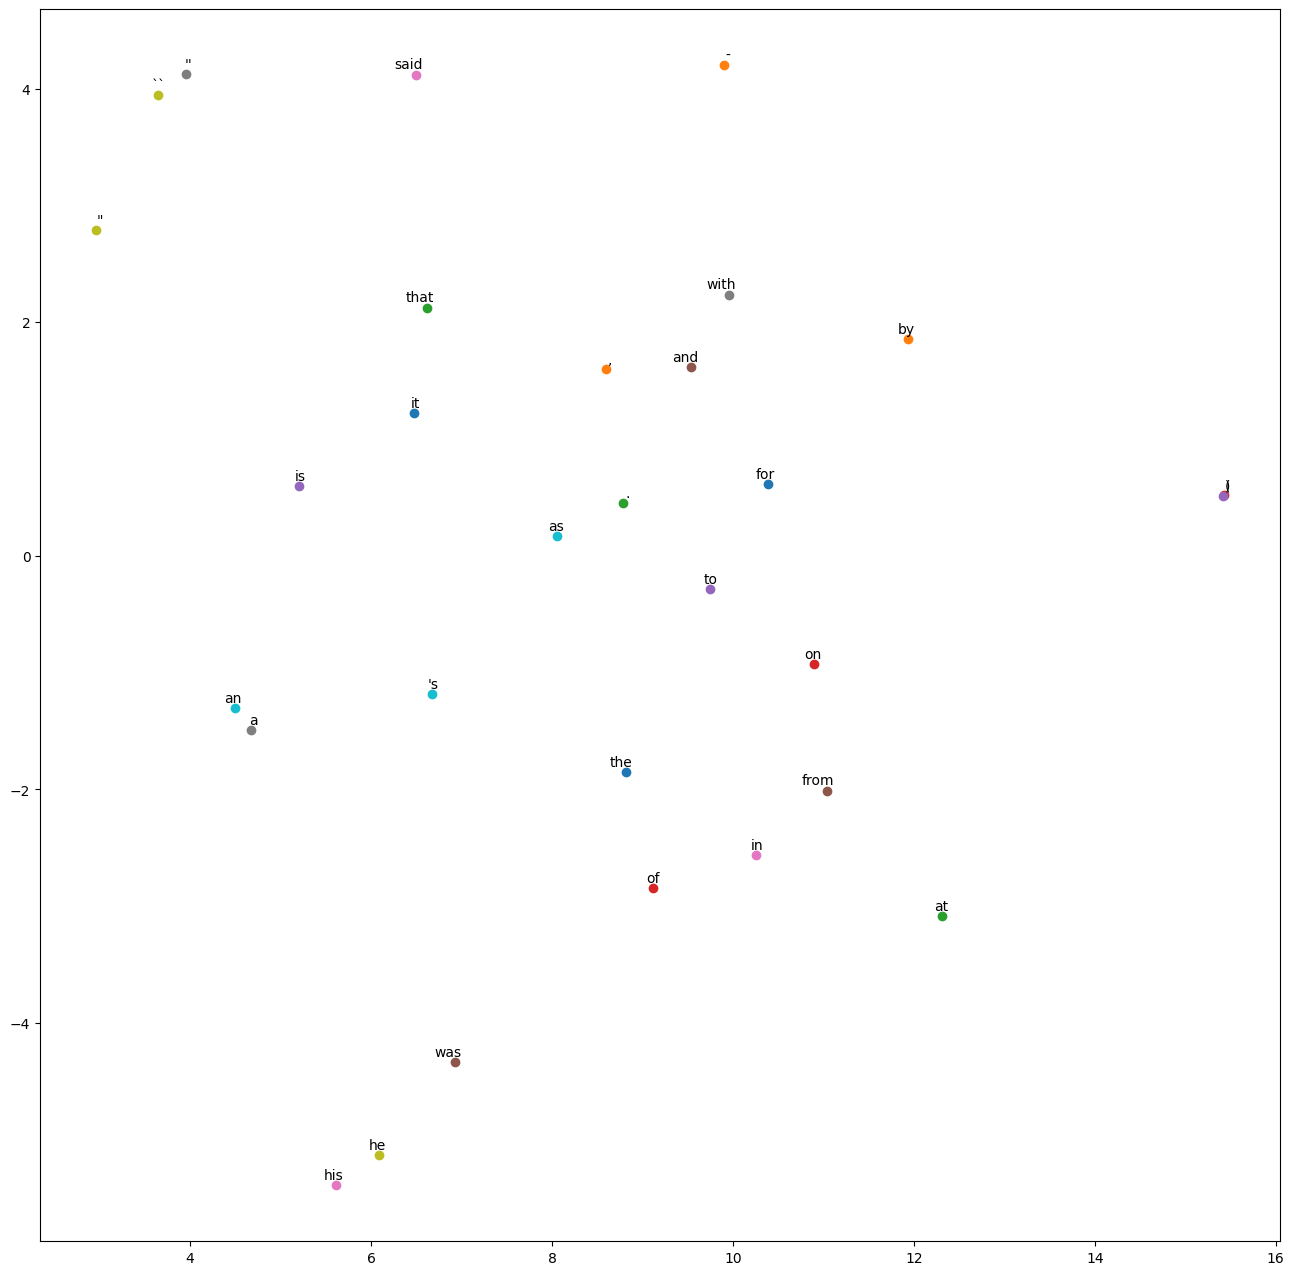

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

def tsne_plot(word_nums):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []
    print(f'{word_nums} first vocabulary: {list(vocab.keys())[:word_nums]}')
    for word in list(vocab.keys())[:word_nums]:
        tokens.append(vocab[word])
        labels.append(word)
    tsne_model = TSNE(perplexity=int(word_nums/3), n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(np.array(tokens))
    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
    plt.figure(figsize=(16, 16))
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

tsne_plot(30)

Using gensim

In [ ]:
from gensim.models import KeyedVectors
from gensim.downloader import load

glove_model = load('glove-wiki-gigaword-50')
word_pairs = [('learn', 'learning'), ('india', 'indian'), ('fame', 'famous')]

# Compute similarity for each pair of words
for pair in word_pairs:
	similarity = glove_model.similarity(pair[0], pair[1])
	print(f"Similarity between '{pair[0]}' and '{pair[1]}' using GloVe: {similarity:.3f}")

[==================================================] 100.0% 66.0/66.0MB downloaded
Similarity between 'learn' and 'learning' using GloVe: 0.802
Similarity between 'india' and 'indian' using GloVe: 0.865
Similarity between 'fame' and 'famous' using GloVe: 0.589


###FastText

- Linear classifier <Br>
Using a linear classifier to train the model (text and labels as vectors). Goal: text vectors are similar to their associated labels. Using Gradient Descent to maximize the probability score of the correct label given its associated text. However, the larger datasets the more expensive computing scores. The solution is using a hierarchical classifier during training.
- Hierarchical classifier <Br>
It represents labels in a binary tree, where each node represents a probability. The path to a given label corresponds to the probabilities along the tree nodes. The binary tree helps significantly reduce the time complexity of training. It doesn't compute scores for every label, instead, it calculates probabilities only along the path to the correct label. This approach maintains accuracy while increasing speed.
- N-grams <Br>
Instead of assigning a vector to each 'word' (as Skip-gram assigns 'I like natural language processing' into 'I', 'like', 'natural', 'language', and 'processing'.), a vector is assigned to each 'subword' ('character n-gram'). So if n=3, then a word like "hello" would result in vectors for "<he", "hel", "ell", "llo", "lo>" (note that "<" and ">" are special characters). The vector for "hello" would be the sum of all the above vectors. This deals with OOV situations because vectors can still be assigned to unseen words as long as the n-grams exist in the vocabulary.

https://fasttext.cc/<br>
https://radimrehurek.com/gensim/models/fasttext.html
<br><br>

Hierarchical Text Classification

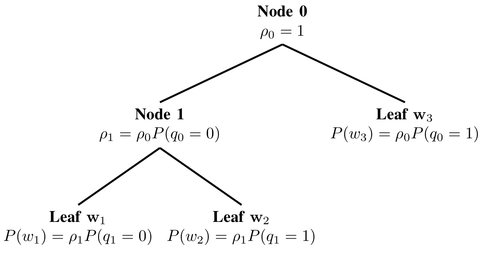

N-grams <Br>
$\text{corpus = }'\text{natural language processing in python}'$

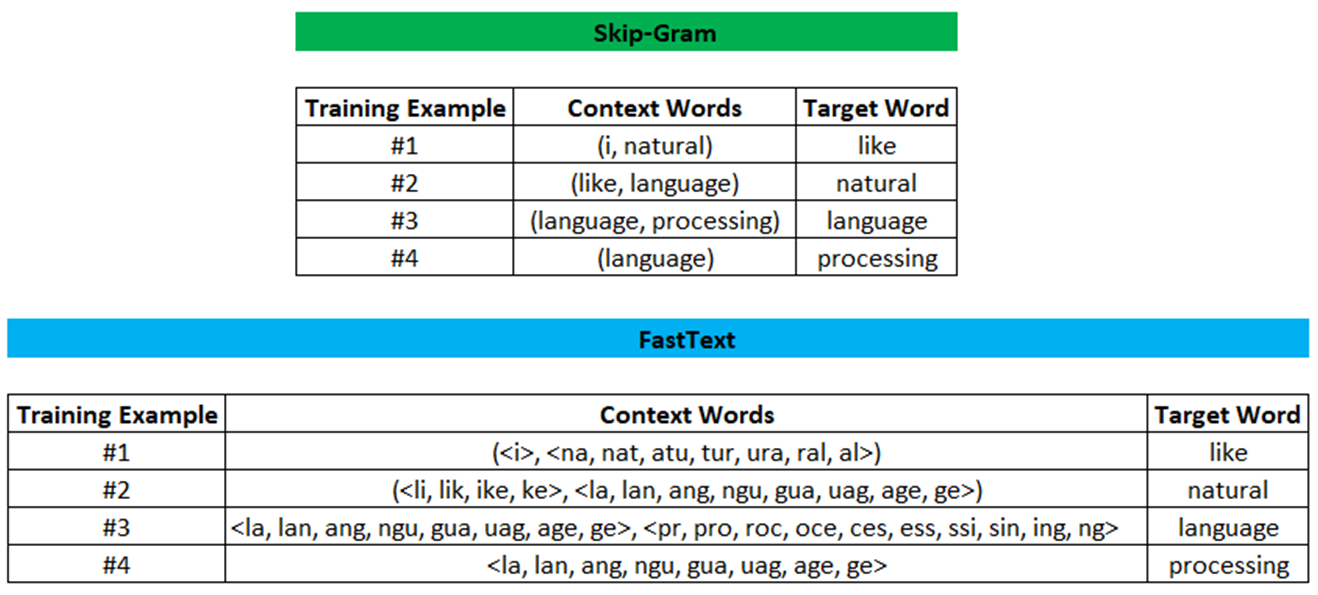

Using gensim

In [ ]:
import gensim.downloader as api
fasttext_model = api.load("fasttext-wiki-news-subwords-300") ## Load the pre-trained fastText model
# Define word pairs to compute similarity for
word_pairs = [('learn', 'learning'), ('india', 'indian'), ('fame', 'famous')]

# Compute similarity for each pair of words
for pair in word_pairs:
	similarity = fasttext_model.similarity(pair[0], pair[1])
	print(f"Similarity between '{pair[0]}' and '{pair[1]}' using FastText: {similarity:.3f}")

[==================================================] 100.0% 958.5/958.4MB downloaded
Similarity between 'learn' and 'learning' using FastText: 0.642
Similarity between 'india' and 'indian' using FastText: 0.708
Similarity between 'fame' and 'famous' using FastText: 0.519


In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline

def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []
    print('model.wv.index_to_key: ', model.wv.index_to_key)
    for word in list(model.wv.index_to_key):
        tokens.append(model.wv[word])
        labels.append(word)
    tsne_model = TSNE(perplexity=int(len(model.wv.index_to_key)/3), n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(np.array(tokens))
    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
    plt.figure(figsize=(16, 16))
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

In [ ]:
import numpy as np
from gensim.models import FastText
from gensim.test.utils import common_texts

word = 'computer'
# Example corpus (replace with your own corpus)
corpus = common_texts
print('corpus: ', corpus)
# Training FastText model
model = FastText(sentences=corpus, vector_size=100, window=15, min_count=1, workers=4, sg=1)
# Example usage: getting embeddings for a word
word_embedding = model.wv[word]
print(f"Word_embedding for '{word}': ", word_embedding)
# Most similar words to a given word
similar_words = model.wv.most_similar(word)
print(f"Most similar words to '{word}':", similar_words)

corpus:  [['human', 'interface', 'computer'], ['survey', 'user', 'computer', 'system', 'response', 'time'], ['eps', 'user', 'interface', 'system'], ['system', 'human', 'system', 'eps'], ['user', 'response', 'time'], ['trees'], ['graph', 'trees'], ['graph', 'minors', 'trees'], ['graph', 'minors', 'survey']]
Word_embedding for 'computer':  [ 0.00029695  0.00033107 -0.00087779  0.00033943 -0.00050173 -0.00204214
 -0.00124065 -0.00194045  0.00134506 -0.00241266  0.00091852 -0.00103152
 -0.0007634   0.00007312  0.00138285  0.00051945 -0.00029884 -0.00119463
 -0.00117237 -0.00060897 -0.00067838  0.00039278  0.00009881  0.0008127
  0.00058197  0.00070192 -0.00073684 -0.00103962 -0.00062528 -0.00024048
 -0.00119316 -0.00026593  0.00073602 -0.00072149 -0.00127509  0.00012422
  0.00037756 -0.00133156 -0.00273441 -0.00030482  0.00092824 -0.00072817
 -0.00112921 -0.00032191 -0.00020604 -0.00010485 -0.00062299 -0.00161377
  0.00099111  0.00009231  0.00036796 -0.00053785  0.00113322  0.00087075
 -0.

model.wv.index_to_key:  ['system', 'graph', 'trees', 'user', 'minors', 'eps', 'time', 'response', 'survey', 'computer', 'interface', 'human']


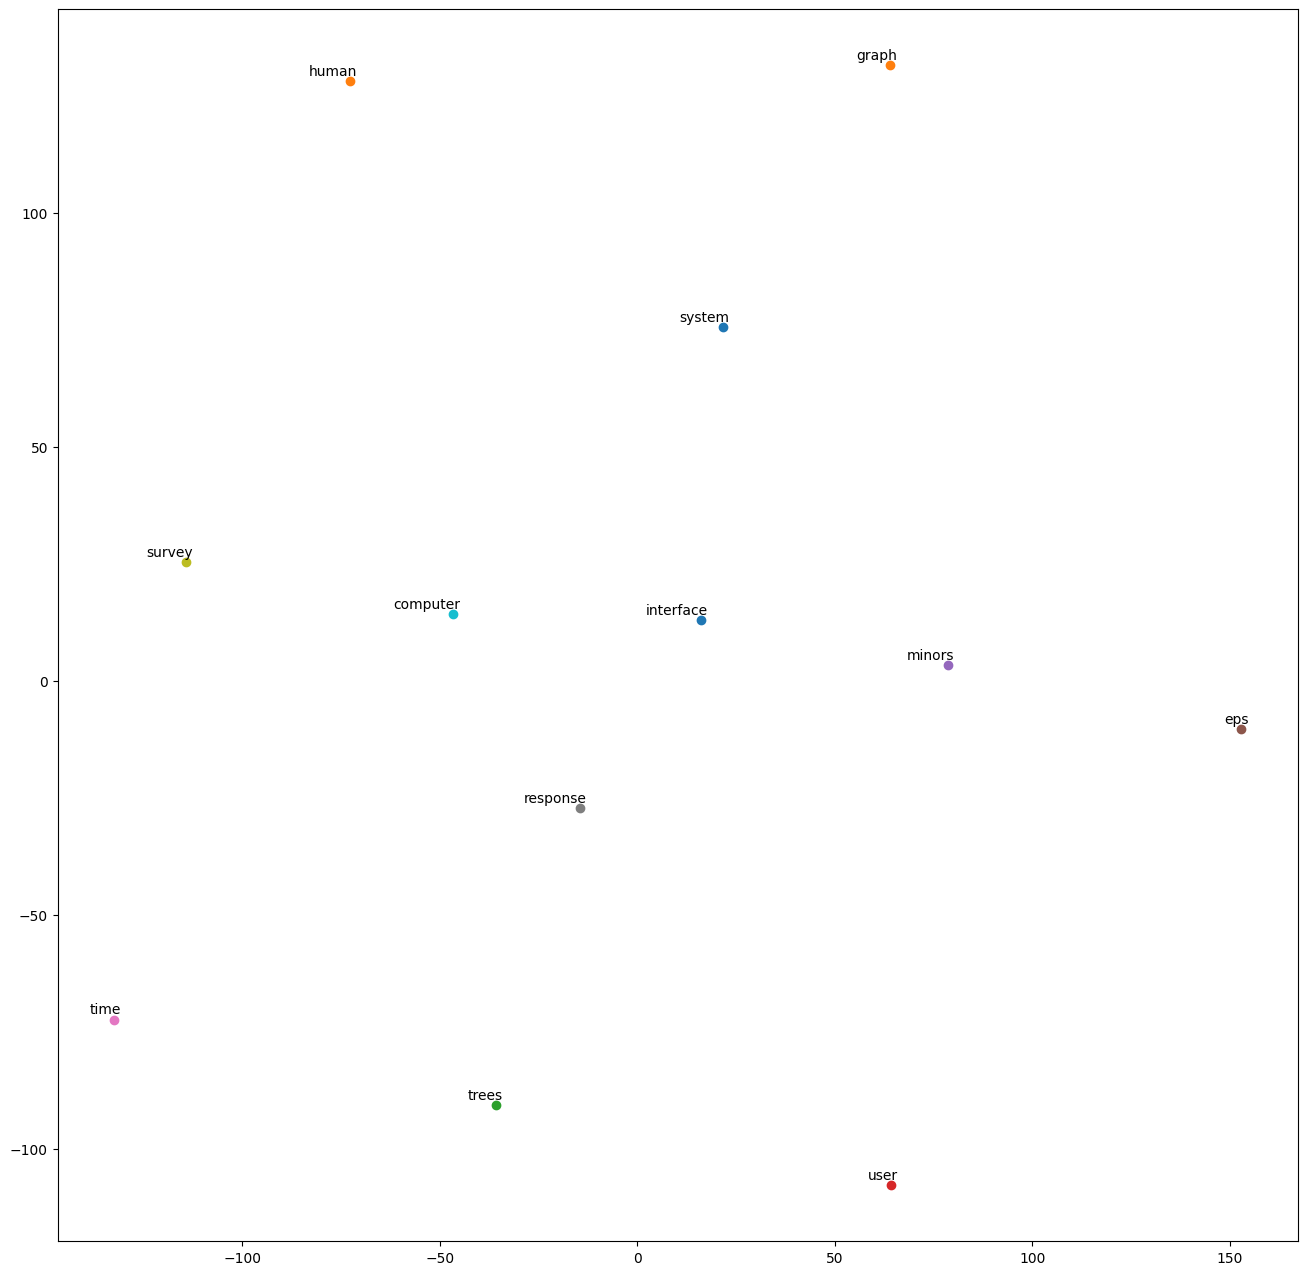

In [ ]:
model = FastText(sentences=corpus, vector_size=100, window=15, min_count=1, workers=4, sg=1)
tsne_plot(model)